<a href="https://colab.research.google.com/github/prateekchandrajha/mastering-ml-algorithms/blob/main/entity_containment_bipartite_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIR Quiz - 8: Draw an Entity Containment Graph.

## I have used NetworkX python library to create a bipartite containment graph using 3 documents/text fragments and 3 entities.

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Text Fragments

In [23]:
print("The text fragments considered are:\n")
print("""<e id="1">Prof. Venkatesh</e> will speak about \
Information Retrieval together with <e id="2">\
Prateek</e>.\n""")
print("""<e id="2">Prateek</e> demonstrates the future \
importance of Information Retrieval.\n""")
print("""Whereas <e id="1">Prof. Venkatesh</e> analyzes \
code search quantities, <e id="3">Ashish</e> \
is more concerned with code search evaluation.\n""")

The text fragments considered are:

<e id="1">Prof. Venkatesh</e> will speak about Information Retrieval together with <e id="2">Prateek</e>.

<e id="2">Prateek</e> demonstrates the future importance of Information Retrieval.

Whereas <e id="1">Prof. Venkatesh</e> analyzes code search quantities, <e id="3">Ashish</e> is more concerned with code search evaluation.



## Creating the Graph

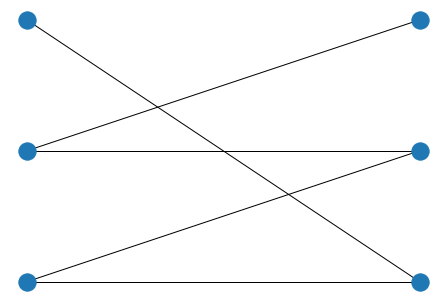

In [24]:
B = nx.Graph()
B.add_nodes_from([1,2,3], bipartite=0) # Add the node attribute "bipartite"
B.add_nodes_from(['a','b','c'], bipartite=1)
B.add_edges_from([(1,'a'), (1,'c'), (2,'a'), (2,'b'), (3,'c')])

# Separate by group
l, r = nx.bipartite.sets(B)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw(B, pos=pos)
plt.show()

In [25]:
B.nodes(data=True)

NodeDataView({1: {'bipartite': 0}, 2: {'bipartite': 0}, 3: {'bipartite': 0}, 'a': {'bipartite': 1}, 'b': {'bipartite': 1}, 'c': {'bipartite': 1}})

In [29]:
# labels = dict((n, "(" + str(n) + "," + str(d['bipartite']) + ")") for n,d in B.nodes(data=True))

labels = {1: 'Document 1', 2: 'Document 2', 3: 'Document 3', 'a': 'Prof. Venkatesh', 'b': 'Prateek', 'c': 'Ashish'}


In [30]:
labels

{1: 'Document 1',
 2: 'Document 2',
 3: 'Document 3',
 'a': 'Prof. Venkatesh',
 'b': 'Prateek',
 'c': 'Ashish'}

## NetworkX doesn't automatically make space for long labels so I had to do extend the pyplot margins myself resulting in a bipartite ENTITY CONTAINMENT GRAPH using 3 documents and 3 entities 

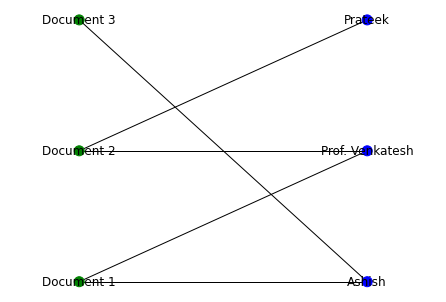

In [42]:
nx.draw(B, pos=pos, labels=labels, node_color=['green','green','green','blue','blue','blue'], node_size=100)
# plt.figure(figsize=(12,9))
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.25
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.show()